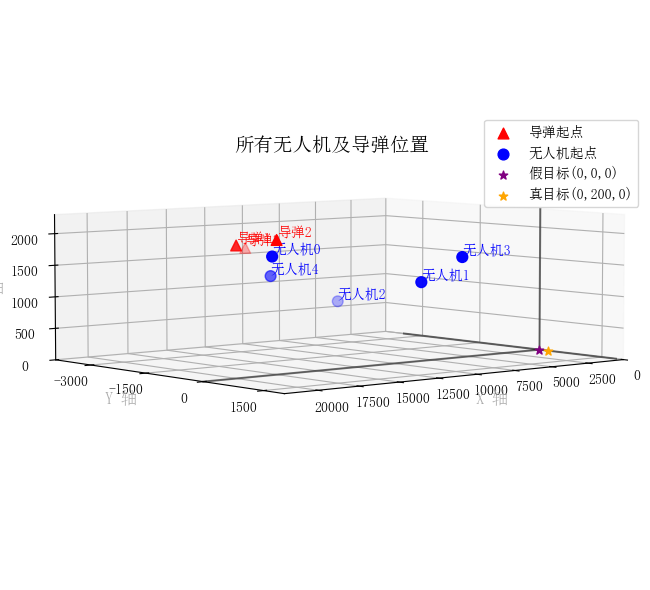

In [16]:

import matplotlib.pyplot as plt
import numpy as np

# 字体与负号设置
plt.rcParams["font.family"] = ["SimSun"]
plt.rcParams['axes.unicode_minus'] = False

# 数据定义
missile_starts = [
    np.array([20000, 0, 2000]),
    np.array([19000, 600, 2100]),
    np.array([18000, -600, 1900])
]

drone_pos = {
    0: np.array([17800, 0, 1800]),
    1: np.array([12000, 1400, 1400]),
    2: np.array([6000, -3000, 700]),
    3: np.array([11000, 2000, 1800]),
    4: np.array([13000, -2000, 1300])
}

# 创建图形（增大尺寸以提高清晰度）
fig = plt.figure(figsize=(10, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# ---------------------- 1. 优化点的关系展示 ----------------------
## 导弹起点：每个点标注序号，区分个体
missile_pts = np.array(missile_starts)
missile_scatter = ax.scatter(
    missile_pts[:, 0], missile_pts[:, 1], missile_pts[:, 2],
    color='red', s=60, label='导弹起点',marker='^'
)
for i, (x, y, z) in enumerate(missile_starts):
    ax.text(x, y, z, f'导弹{i+1}', color='red', fontsize=10, verticalalignment='bottom')

## 无人机起点：标注编号，区分个体
drone_pts = np.array(list(drone_pos.values()))
drone_keys = list(drone_pos.keys())
drone_scatter = ax.scatter(
    drone_pts[:, 0], drone_pts[:, 1], drone_pts[:, 2],
    color='blue', s=60, label='无人机起点'
)

for i, idx in enumerate(drone_keys):
    x, y, z = drone_pts[i]
    ax.text(x, y, z, f'无人机{idx}', color='blue', fontsize=10, verticalalignment='bottom')

## 目标点：调整标注位置，避免遮挡
fake_target = (0, 0, 0)
real_target = (0, 200, 0)

ax.scatter(*fake_target, color='purple', marker='*',s=40, label='假目标(0,0,0)')
ax.scatter(*real_target, color='orange', s=40, label='真目标(0,200,0)', marker='*')

# ---------------------- 2. 优化坐标轴显示 ----------------------
## 绘制坐标轴的“轴线”（从原点延伸，直观展示方向）
ax.plot([0, 22000], [0, 0], [0, 0], color='black', linestyle='-', alpha=0.5)  # X轴
ax.plot([0, 0], [-3500, 2000], [0, 0], color='black', linestyle='-', alpha=0.5)   # Y轴
ax.plot([0, 0], [0, 0], [0, 2300], color='black', linestyle='-', alpha=0.5)   # Z轴

## 坐标轴标签与刻度
ax.set_xlabel('X 轴', fontsize=12, color='darkgray')
ax.set_ylabel('Y 轴', fontsize=12, color='darkgray')
ax.set_zlabel('Z 轴', fontsize=12, color='darkgray')
ax.set_xlim([0, 22000])    # 限制X范围，让点分布更合理
ax.set_ylim([-4000, 2000]) # 限制Y范围
ax.set_zlim([0, 2300])     # 限制Z范围
ax.set_yticks([-3000, -1500, 0, 1500])
ax.set_zticks([0, 500, 1000, 1500, 2000])
# ---------------------- 3. 优化背景与整体样式 ----------------------
ax.set_facecolor('white')  # 子图背景色为白色
ax.grid(color='lightgray', linestyle='-', alpha=0.1, linewidth=0.2)  # 浅灰网格+透明，避免遮挡
ax.view_init(elev=5, azim=50)  # 调整视角（仰角30°，方位角-45°），让层次更清晰
ax.set_title('所有无人机及导弹位置', fontsize=14, color='black', y=0.8)

# 图例向下移动：使用bbox_to_anchor调整位置，(1.05, 0.8)表示右侧稍下方
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 0.82), fontsize=10)

ax.set_box_aspect([3, 2.5, 1])  # x:y:z 比例为 4:1:1（可根据效果调整“4”为更大/更小值
plt.tight_layout()
plt.show()